<a href="https://colab.research.google.com/github/muhamadrefo/Kolera/blob/master/VisualizationCholera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Dataset/Kolera
%ls

/content/drive/My Drive/Dataset/Kolera
datasets_kolera.csv  Kolera.csv  model_LR1.pkl  unfilteredCholera.csv


In [3]:
#importing library and packages
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tt
%matplotlib inline

#Step 1: Preparing the Dataset

In [15]:
#show the dataset 
data = pd.read_csv('data.csv')
data

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677,5,0.7,Eastern Mediterranean
1,Afghanistan,2015,58064,8,0.01,Eastern Mediterranean
2,Afghanistan,2014,45481,4,0.0,Eastern Mediterranean
3,Afghanistan,2013,3957,14,0.35,Eastern Mediterranean
4,Afghanistan,2012,12,0,0.1,Eastern Mediterranean
...,...,...,...,...,...,...
2487,Russian Federation,1980,NaN,0,NaN,Europe
2488,Russian Federation,1971,NaN,0,NaN,Europe
2489,Sweden,1984,NaN,0,NaN,Europe
2490,Switzerland,1980,NaN,0,NaN,Europe


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 2492 non-null   object
 1   Year                                    2492 non-null   int64 
 2   Number of reported cases of cholera     2470 non-null   object
 3   Number of reported deaths from cholera  2375 non-null   object
 4   Cholera case fatality rate              2365 non-null   object
 5   WHO Region                              2492 non-null   object
dtypes: int64(1), object(5)
memory usage: 116.9+ KB


In [17]:
#replace missing data (1 time run)
data['Cholera case fatality rate'] = data['Cholera case fatality rate'].str.replace('0.0', '0')
data['Cholera case fatality rate'] = data['Cholera case fatality rate'].str.replace('0 0', '0')
data['Number of reported deaths from cholera']=data['Number of reported deaths from cholera'].str.replace('0 0', '0')
data['Number of reported cases of cholera']=data['Number of reported cases of cholera'].str.replace('3 5', '0')
data=data.replace(np.nan, '0', regex=True)
data=data.replace('Unknown', '0', regex=True)

In [20]:
#Change type of data
data['WHO Region']=data['WHO Region'].astype('str')
data['Country']=data['Country'].astype('str')
data['Cholera case fatality rate']=data['Cholera case fatality rate'].astype('float')
data['Number of reported cases of cholera']=data['Number of reported cases of cholera'].astype('int64')
data['Number of reported deaths from cholera']=data['Number of reported deaths from cholera'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 2492 non-null   object 
 1   Year                                    2492 non-null   int64  
 2   Number of reported cases of cholera     2492 non-null   int64  
 3   Number of reported deaths from cholera  2492 non-null   int64  
 4   Cholera case fatality rate              2492 non-null   float64
 5   WHO Region                              2492 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 116.9+ KB


In [76]:
#rename Columns of dataset
data = data.rename(columns={'Number of reported cases of cholera':'Cases',
                   'Number of reported deaths from cholera':'Deaths',
                   'Cholera case fatality rate':'Fatality rate'})

In [77]:
data

,Country,Year,Cases,Deaths,Fatality rate,WHO Region
0,Afghanistan,2016,677,5,0.70,Eastern Mediterranean
1,Afghanistan,2015,58064,8,1.00,Eastern Mediterranean
2,Afghanistan,2014,45481,4,0.00,Eastern Mediterranean
3,Afghanistan,2013,3957,14,0.35,Eastern Mediterranean
4,Afghanistan,2012,12,0,0.10,Eastern Mediterranean
...,...,...,...,...,...,...
2487,Russian Federation,1980,0,0,0.00,Europe
2488,Russian Federation,1971,0,0,0.00,Europe
2489,Sweden,1984,0,0,0.00,Europe
2490,Switzerland,1980,0,0,0.00,Europe


In [78]:
#check if there's still null inside the dataset
data.isnull().sum()

Country          0
Year             0
Cases            0
Deaths           0
Fatality rate    0
WHO Region       0
dtype: int64

#Step 2: Visualization Dataset

In [79]:
#Split dataset for what country do u need for
idn = data[data['Country']=='Indonesia']
idn

,Country,Year,Cases,Deaths,Fatality rate,WHO Region
975,Indonesia,2008,1007,27,2.68,South-East Asia
976,Indonesia,2005,1338,19,1.42,South-East Asia
977,Indonesia,2001,561,6,1.07,South-East Asia
978,Indonesia,1997,66,0,0.00,South-East Asia
979,Indonesia,1996,66,0,0.00,South-East Asia
980,Indonesia,1994,47,0,0.00,South-East Asia
981,Indonesia,1993,3564,25,0.70,South-East Asia
982,Indonesia,1992,25,0,0.00,South-East Asia
983,Indonesia,1991,6202,55,0.89,South-East Asia
984,Indonesia,1990,155,0,0.00,South-East Asia


In [80]:
idn.shape

(39, 6)

In [81]:
SEA = data[data['WHO Region']=='South-East Asia']
SEA

,Country,Year,Cases,Deaths,Fatality rate,WHO Region
128,Bangladesh,2000,1021,16,1.57,South-East Asia
129,Bangladesh,1999,3440,63,1.83,South-East Asia
130,Bangladesh,1998,1067,26,2.44,South-East Asia
131,Bangladesh,1997,1959,95,4.85,South-East Asia
132,Bangladesh,1996,418,0,0.00,South-East Asia
...,...,...,...,...,...,...
2145,Thailand,1959,4368,613,14.03,South-East Asia
2146,Thailand,1958,10201,1426,13.98,South-East Asia
2147,Thailand,1951,1,0,0.00,South-East Asia
2148,Thailand,1949,16,2,12.50,South-East Asia


Text(0.5, 1.0, 'Reported Cases of cholera from South-East Asia')

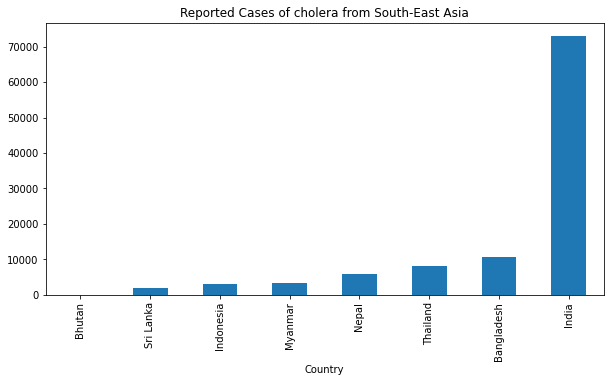

In [95]:
#show plot reported cases from SEA

SEAtop = SEA[(SEA['Year']<=2016) & (SEA['Year']>=1994)]
resultTopC = SEAtop.groupby('Country')['Cases'].sum()
resultTopC.sort_values()[:10].plot(kind='bar', figsize=(10,5))
plt.title('Reported Cases of cholera from South-East Asia')

In [97]:
resultTopC.sort_values()[:10]

Country
Bhutan           44
Sri Lanka      2085
Indonesia      3085
Myanmar        3270
Nepal          5817
Thailand       8180
Bangladesh    10764
India         72952
Name: Cases, dtype: int64

Text(0.5, 1.0, 'Reported Deaths Cases of cholera from South-East Asia')

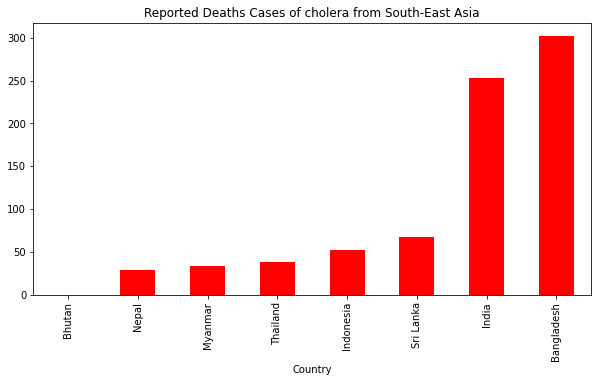

In [94]:
#show plot reported deaths cases from SEA

SEAtop = SEA[(SEA['Year']<=2016) & (SEA['Year']>=1994)]
resultTopD = SEAtop.groupby('Country')['Deaths'].sum()
resultTopD.sort_values()[:10].plot(kind='bar', figsize=(10,5), color='red')
plt.title('Reported Deaths Cases of cholera from South-East Asia')

In [98]:
resultTopD.sort_values()[:10]

Country
Bhutan          0
Nepal          29
Myanmar        34
Thailand       38
Indonesia      52
Sri Lanka      67
India         253
Bangladesh    302
Name: Deaths, dtype: int64

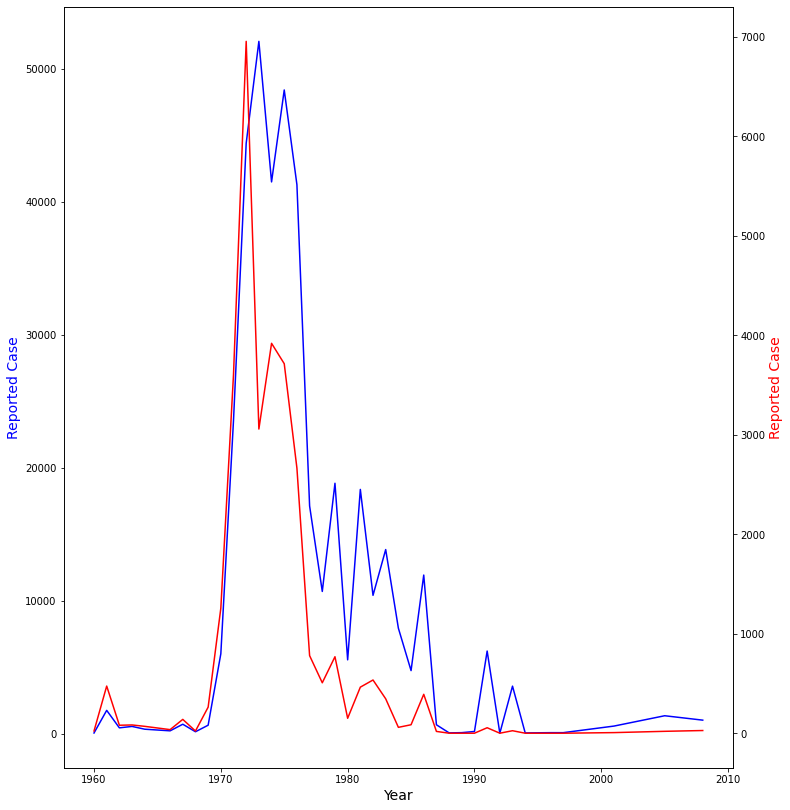

In [128]:
#Report from Indonesia
fig, ax = plt.subplots(figsize=(12,14))
ax.plot(idn['Year'], idn['Cases'], color= 'blue')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Reported Case', color='blue', fontsize=14)

ax2 = ax.twinx()
ax2.plot(idn['Year'], idn['Deaths'], color= 'red')
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Reported Case', color='red', fontsize=14)
plt.show()

#Step 3: